## Methanol dasar
#### Notebook to make moment maps of the 107 GHz methanol "dasar" line, as well as other methanol lines in our ID list. Also to make moment maps of all in-band c-HCCCH lines.
Last edited 8/22/22.

In [1]:
from astropy.table import Table, vstack
import glob

tbls = []
tbl_fns = glob.glob('/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/modeling/line_lists/*.csv')
for tbl_fn in tbl_fns:
    tbl = Table.read(tbl_fn)
    tbl.remove_column('Spectrum')
    tbls.append(tbl)
    
combined_tbls = vstack(tbls)

In [2]:
methanol_lines = combined_tbls[combined_tbls['Species'] == 'CH3OHvt=0-2']
methanol13_lines = combined_tbls[combined_tbls['Species'] == '13CH3OHvt=0']

In [3]:
def clean_name(x):
    return x.replace("(","").replace(")","").replace("=","").replace("+","p").replace("/","")

In [4]:
fns = glob.glob("/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source*clean_2sigma_n50000_masked_3sigma_pbmask0p18.image")

In [5]:
from spectral_cube import SpectralCube
from astropy import units as u

basedir = '/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/figures/methanol_moments'

vmin = -5*u.km/u.s # I did -10 km/s originally
vmax = 15*u.km/u.s # I did 50 km/s and 70 km/s originally

for fn in fns:
    cube = SpectralCube.read(fn, use_dask=True).with_spectral_unit(u.GHz)

    slc  = cube[:1].subcube_slices_from_mask(cube[:1].mask)
    cube = cube[:,slc[1],slc[2]]
    cube.beam_threshold = 10000

    # THIS SHOULD ALL BE REST FREQUENCY! BECAUSE WE'LL CAPTURE EMISSION WITHIN THE VEL RANGE

    for row in methanol_lines:
        restf = u.Quantity(row['Frequency (GHz)'], u.GHz)
        if cube.spectral_axis.min() < restf and cube.spectral_axis.max() > restf:
            outfn = f"{clean_name(row['Species'])}_rest{row['Frequency (GHz)']:0.4f}_{row['Dataset']}_{round(vmax.value)}kms"
            filename_to_test = outfn.split('.mom0')[0]
            if not glob.glob(f'{basedir}/{filename_to_test}*.mom0.png'):
                print(outfn)
                scube = cube.with_spectral_unit(u.km/u.s, rest_value=restf, velocity_convention='radio').spectral_slab(vmin, vmax)
#                 mx = scube.max(axis=0)
#                 mx.quicklook(f'{basedir}/{outfn}.max.png')
                m0 = scube.moment0(axis=0)
                m0.quicklook(f'{basedir}/{outfn}.mom0.png')

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

In [6]:
from astroquery.splatalogue import Splatalogue

xtbl = Splatalogue.query_lines(85*u.GHz, 275.5*u.GHz, chemical_name='c-HCCCH', 
                               energy_max=50, energy_type='eu_k', line_lists=['SLAIM'])
xtbl_filtered = xtbl[xtbl['Log<sub>10</sub> (A<sub>ij</sub>)'] > -5]
xtbl_filtered

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str10,str18,float64,float64,float64,float64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,str5
c-HCCCHv=0,Cyclopropenylidene,85.338906,7e-06,85.338893,1.4e-05,"2(1,2)-1(0,1)",0.0,16.03935,1.5,-4.53749,--,1.633,2.34951,4.4796,6.44511,SLAIM
c-HCCCHv=0,Cyclopropenylidene,85.656418,4e-06,85.656431,1.7e-05,"4(3,2)-4(2,3)",0.0,18.7083,1.7496,-4.51688,--,17.347,24.95832,20.20419,29.06916,SLAIM
c-HCCCHv=0,Cyclopropenylidene,87.43532,4e-06,--,--,"5(4,2)-5(3,3)",0.0,26.15376,2.4459,-4.46171,--,28.538,41.05958,31.45453,45.25579,SLAIM
c-HCCCHv=0,Cyclopropenylidene,91.516014,1.4e-05,--,--,"4(4,0)-5(1,5)",0.0,0.0,0.0,0.0,--,19.568,28.15383,22.62065,32.54588,SLAIM
c-HCCCHv=0,Cyclopropenylidene,116.77079,5e-06,--,--,"5(2,3)-5(1,4)",0.0,19.7947,1.8512,-4.10782,--,24.616,35.41673,28.51105,41.02081,SLAIM
c-HCCCHv=0,Cyclopropenylidene,117.151188,7e-06,117.151191,9e-06,"3(0,3)-2(1,2)",0.0,26.07784,2.4388,-4.08074,--,4.48,6.44568,8.38774,12.06802,SLAIM
c-HCCCHv=0,Cyclopropenylidene,117.530674,5e-06,--,--,"4(1,3)-4(0,4)",0.0,10.62019,0.9932,-4.17262,--,13.419,19.30684,17.3394,24.94739,SLAIM
c-HCCCHv=0,Cyclopropenylidene,117.546236,7e-06,117.546214,2.6e-05,"3(1,3)-2(0,2)",0.0,26.15483,2.446,-4.07614,--,4.468,6.42842,8.38892,12.06972,SLAIM
c-HCCCHv=0,Cyclopropenylidene,117.550379,5e-06,117.550392,2e-05,"5(3,3)-5(2,4)",0.0,19.74337,1.8464,-4.09939,--,24.617,35.41817,28.53806,41.05966,SLAIM


In [7]:
basedir_c = '/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/figures/cyclopropenylidene_moments'

for fn in fns:
    cube = SpectralCube.read(fn, use_dask=True).with_spectral_unit(u.GHz)

    slc  = cube[:1].subcube_slices_from_mask(cube[:1].mask)
    cube = cube[:,slc[1],slc[2]]
    cube.beam_threshold = 10000

    # THIS SHOULD ALL BE REST FREQUENCY! BECAUSE WE'LL CAPTURE EMISSION WITHIN THE VEL RANGE

    for row in xtbl_filtered:
        restf = u.Quantity(row['Freq-GHz(rest frame,redshifted)'], u.GHz)
        if cube.spectral_axis.min() < restf and cube.spectral_axis.max() > restf:
            outfn = f"{clean_name(row['Species'])}_rest{row['Freq-GHz(rest frame,redshifted)']:0.4f}_{round(vmax.value)}kms"
            filename_to_test = outfn.split('.mom0')[0]
            if not glob.glob(f'{basedir_c}/{filename_to_test}*.mom0.png'):
                print(outfn)
                scube = cube.with_spectral_unit(u.km/u.s, rest_value=restf, velocity_convention='radio').spectral_slab(vmin, vmax)
#                 mx = scube.max(axis=0)
#                 mx.quicklook(f'{basedir}/{outfn}.max.png')
                m0 = scube.moment0(axis=0)
                m0.quicklook(f'{basedir_c}/{outfn}.mom0.png')

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


c-HCCCHv0_rest150.4366_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -6.900e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.785e-02 [aplpy.core]
c-HCCCHv0_rest150.8207_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -8.106e-02 [aplpy.core]
INFO: Auto-setting vmax to  8.914e-02 [aplpy.core]
c-HCCCHv0_rest150.8519_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -9.639e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.517e-01 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


c-HCCCHv0_rest151.3439_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -4.957e-02 [aplpy.core]
INFO: Auto-setting vmax to  7.478e-02 [aplpy.core]
c-HCCCHv0_rest151.3611_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -5.016e-02 [aplpy.core]
INFO: Auto-setting vmax to  5.875e-02 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest145.0896_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -5.844e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.177e+00 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest91.5160_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -3.949e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.094e-02 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest244.2222_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.509e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.745e-01 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest85.6564_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -2.968e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.924e-02 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest87.4353_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -3.642e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.172e-02 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest265.7595_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.862e-01 [aplpy.core]
INFO: Auto-setting vmax to  5.799e-01 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


c-HCCCHv0_rest261.8318_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.764e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.244e-01 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest260.4798_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -2.406e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.061e+00 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


c-HCCCHv0_rest251.5087_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.509e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.589e-01 [aplpy.core]
c-HCCCHv0_rest251.5273_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.498e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.393e-01 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest249.0544_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.524e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.196e-01 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

c-HCCCHv0_rest254.9876_15kms


/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


INFO: Auto-setting vmin to -1.380e-01 [aplpy.core]
INFO: Auto-setting vmax to  3.393e-01 [aplpy.core]


/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encounte

In [8]:
fn_107 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image"
fn_108 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_107_spw31_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image"

In [9]:
methanol_107 = methanol_lines[methanol_lines['freq_spw'] == '106_spw29']
methanol_108 = methanol_lines[methanol_lines['freq_spw'] == '107_spw31'][0]
methanol_107

Dataset,freq_spw,Spectrum type,Species,QNs,Frequency (GHz),Observed frequency (GHz),Velocity (km/s),Comment,E_u (K)
str7,str10,str4,str22,str38,float64,float64,float64,str170,float64
data_59,106_spw29,mean,CH3OHvt=0-2,"3(1,3)-4(0,4)A,vt=0",107.013831,107.0106,9.0,Absorption against the CMB!!! https://ui.adsabs.harvard.edu/abs/2008A%26A...489.1175P/abstract,--


In [10]:
methanol_108

Dataset,freq_spw,Spectrum type,Species,QNs,Frequency (GHz),Observed frequency (GHz),Velocity (km/s),Comment,E_u (K)
str7,str10,str4,str22,str38,float64,float64,float64,str170,float64
data_59,107_spw31,max,CH3OHvt=0-2,"0(0,0)-1(-1,1)",108.893929,108.8792532,40.0,"In Belloche. SPL doesn't show? Could also be CH3OCHOv=0 14(3,12)-14(2,13)A at 108.883548 (12 km/s).",--


In [11]:
cube_107 = SpectralCube.read(fn_107, use_dask=True).with_spectral_unit(u.GHz).to(u.K)
cube_108 = SpectralCube.read(fn_108, use_dask=True).with_spectral_unit(u.GHz).to(u.K)

slc_107 = cube_107[:1].subcube_slices_from_mask(cube_107[:1].mask)
slc_108 = cube_108[:1].subcube_slices_from_mask(cube_108[:1].mask)

cube_107 = cube_107[:,slc_107[1],slc_107[2]]
cube_108 = cube_108[:,slc_108[1],slc_108[2]]

cube_107.beam_threshold = 10000
cube_108.beam_threshold = 10000

restf_107 = u.Quantity(methanol_107['Frequency (GHz)'], u.GHz)
if cube_107.spectral_axis.min() < restf_107 and cube_107.spectral_axis.max() > restf_107:
    scube_107 = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(vmin, vmax)
    m0_107 = scube_107.moment0(axis=0)

restf_108 = u.Quantity(methanol_108['Frequency (GHz)'], u.GHz)
if cube_108.spectral_axis.min() < restf_108 and cube_108.spectral_axis.max() > restf_108:
    scube_108 = cube_108.with_spectral_unit(u.km/u.s, rest_value=restf_108, velocity_convention='radio').spectral_slab(vmin, vmax)
    m0_108 = scube_108.moment0(axis=0)

/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/anaconda/lib/python3.7/site-packages/casa_formats_io-0.1-py3.7-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"
/blue/adamginsburg/abulatek/radio-beam/radio_beam/multiple_beams.py:286: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warni

[2.5]


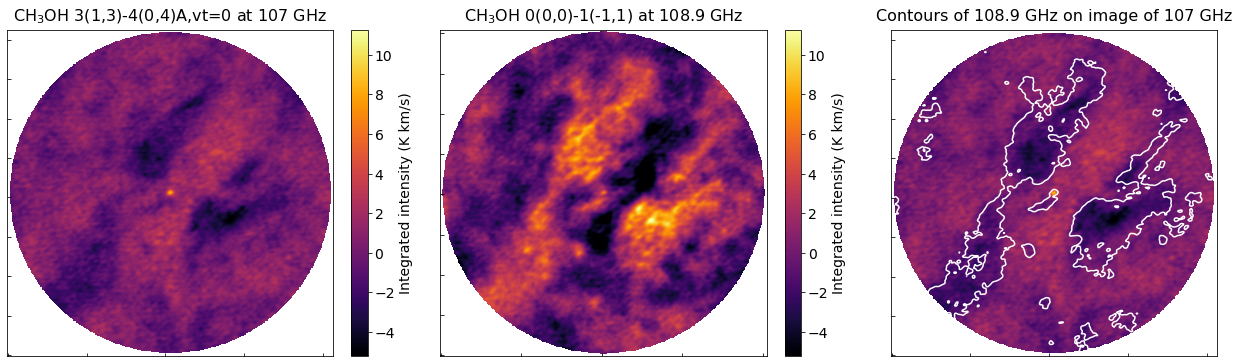

In [12]:
import matplotlib.pyplot as plt
import numpy as np

SM_SIZE = 10
MD_SIZE = 14
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

plt.figure(figsize = (22, 6))

from astropy.visualization import simple_norm
highest_freq_norm = simple_norm(m0_108.value, min_percent = 1, max_percent = 99.99)

ax1 = plt.subplot(131,) 
ax2 = plt.subplot(132,)
ax3 = plt.subplot(133,)

contour_levels = [2.5]
print(contour_levels)

im1 = ax1.imshow(m0_107.value, norm = highest_freq_norm, origin = 'lower', cmap = 'inferno')
im2 = ax2.imshow(m0_108.value, norm = highest_freq_norm, origin = 'lower', cmap = 'inferno')
ax3.imshow(m0_107.value, norm = highest_freq_norm, origin = 'lower', cmap = 'inferno')
ax3.contour(m0_108.value, contour_levels, colors = 'w', 
            extent = (0, m0_107.shape[0], 0,m0_107.shape[1]))

im_ratio_107 = m0_107.shape[0]/m0_107.shape[1]
im_ratio_108 = m0_108.shape[0]/m0_108.shape[1]

cbar1 = plt.colorbar(mappable = im1, ax = ax1, label = "Integrated intensity (K km/s)", fraction = 0.047*im_ratio_107)
cbar2 = plt.colorbar(mappable = im2, ax = ax2, label = "Integrated intensity (K km/s)", fraction = 0.047*im_ratio_108)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(direction = 'in')
    ax.xaxis.set_tick_params(labelbottom = False)
    ax.yaxis.set_tick_params(labelleft = False)
    
ax1.set_title("CH$_3$OH 3(1,3)-4(0,4)A,vt=0 at 107 GHz", y = 1.01)
ax2.set_title("CH$_3$OH 0(0,0)-1(-1,1) at 108.9 GHz", y = 1.01)
ax3.set_title("Contours of 108.9 GHz on image of 107 GHz", y = 1.01)

# plt.suptitle(f'Range: {round(vmin.value)} km/s to {round(vmax.value)} km/s', fontsize = 20, y = 1.02)

plt.rcParams.update({
    "figure.facecolor":  'w',
    "axes.facecolor":    'w',
    "savefig.facecolor": 'w'
})
plt.savefig(f'{basedir}/methanol_comparison_{round(vmax.value)}kms.png', dpi = 250, bbox_inches = 'tight')